In [2]:
import math
from math import sqrt

import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import json
import pathlib
import tikzplotlib
from collections import defaultdict


In [3]:
print(tikzplotlib.Flavors.latex.preamble())

\documentclass{standalone}
\usepackage[utf8]{inputenc}
\usepackage{pgfplots}
\DeclareUnicodeCharacter{2212}{−}
\usepgfplotslibrary{groupplots,dateplot}
\usetikzlibrary{patterns,shapes.arrows}
\pgfplotsset{compat=newest}



In [4]:
# mpl.use("pgf")
# mpl.rcParams.update({
    # "pgf.texsystem": "pdflatex",
    # 'font.family': 'serif',
    # 'text.usetex': True,
    # 'pgf.rcfonts': False,
# })

In [5]:
def read_jsons():

    data = []
    # Read jsons files of build/semana03/circles with pathlib
    jsons = list(pathlib.Path("../build/semana06/experiments/").glob("nointer*.json"))
    jsons.sort()
    print(jsons)
    
    for json_file in jsons:
        with open(json_file, "r") as f:
            json_values = json.load(f)
            data.append(json_values)


    return pd.DataFrame(data)



In [29]:
df = read_jsons()
default_palette = sns.color_palette("Dark2")


hue_categories = df.container.unique()  
hue_colors = {category: color for category, color in zip(hue_categories, default_palette)}


[PosixPath('../build/semana06/experiments/nointersect_binary_tree_1000_1.json'), PosixPath('../build/semana06/experiments/nointersect_binary_tree_1000_2.json'), PosixPath('../build/semana06/experiments/nointersect_binary_tree_1000_3.json'), PosixPath('../build/semana06/experiments/nointersect_binary_tree_1000_4.json'), PosixPath('../build/semana06/experiments/nointersect_binary_tree_1000_5.json'), PosixPath('../build/semana06/experiments/nointersect_binary_tree_100_1.json'), PosixPath('../build/semana06/experiments/nointersect_binary_tree_100_2.json'), PosixPath('../build/semana06/experiments/nointersect_binary_tree_100_3.json'), PosixPath('../build/semana06/experiments/nointersect_binary_tree_100_4.json'), PosixPath('../build/semana06/experiments/nointersect_binary_tree_100_5.json'), PosixPath('../build/semana06/experiments/nointersect_binary_tree_10_1.json'), PosixPath('../build/semana06/experiments/nointersect_binary_tree_10_2.json'), PosixPath('../build/semana06/experiments/nointer

In [38]:
df = read_jsons()

[PosixPath('../build/semana06/experiments/nointersect_binary_tree_1000_1.json'), PosixPath('../build/semana06/experiments/nointersect_binary_tree_1000_2.json'), PosixPath('../build/semana06/experiments/nointersect_binary_tree_1000_3.json'), PosixPath('../build/semana06/experiments/nointersect_binary_tree_1000_4.json'), PosixPath('../build/semana06/experiments/nointersect_binary_tree_1000_5.json'), PosixPath('../build/semana06/experiments/nointersect_binary_tree_100_1.json'), PosixPath('../build/semana06/experiments/nointersect_binary_tree_100_2.json'), PosixPath('../build/semana06/experiments/nointersect_binary_tree_100_3.json'), PosixPath('../build/semana06/experiments/nointersect_binary_tree_100_4.json'), PosixPath('../build/semana06/experiments/nointersect_binary_tree_100_5.json'), PosixPath('../build/semana06/experiments/nointersect_binary_tree_10_1.json'), PosixPath('../build/semana06/experiments/nointersect_binary_tree_10_2.json'), PosixPath('../build/semana06/experiments/nointer

In [34]:
df

,n,time,sort_case,container,length,length_std,segments,intersections
0,961,0.000970,box,binary_tree,0.1,0.01,"[[4.46430982, 16.8721232, 16.2378156, 6.077671...",[]
1,961,0.000419,box,binary_tree,0.1,0.01,"[[0.971243296, 15.1450618, 11.8790451, 9.76630...",[]
2,961,0.000425,box,binary_tree,0.1,0.01,"[[11.0783579, 0.379890375, 18.1237206, 11.9924...",[]
3,961,0.000416,box,binary_tree,0.1,0.01,"[[9.43569259, 24.9199379, 25.8195272, 31.91350...",[]
4,961,0.000441,box,binary_tree,0.1,0.01,"[[0.750035121, 13.353818, 14.1700337, 10.84240...",[]
...,...,...,...,...,...,...,...,...
162,10,0.000011,big_segments,unordered_list,0.1,0.01,"[[26.8832405, 15.6611231, 975.891889, 34.58695...",[]
163,10,0.000006,big_segments,unordered_list,0.1,0.01,"[[43.7565573, 70.7115368, 959.800621, 8.683855...",[]
164,10,0.000006,big_segments,unordered_list,0.1,0.01,"[[62.677228, 74.7094181, 962.198638, 15.560759...",[]
165,10,0.000006,big_segments,unordered_list,0.1,0.01,"[[76.4060574, 42.7657096, 970.908665, 35.07104...",[]


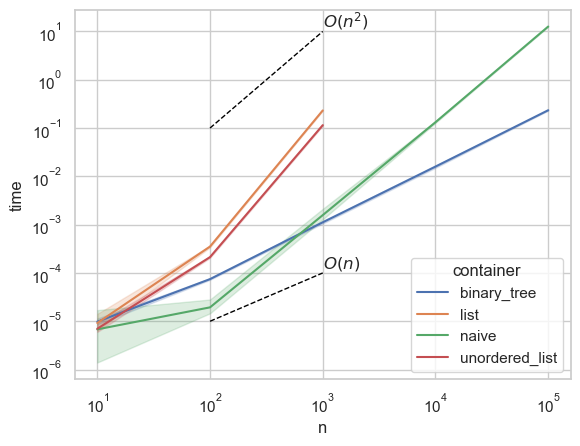

In [36]:
fig, ax = plt.subplots(1, 1)
sns.set_theme(style="whitegrid")
sort_case = "big_segments"
sns.lineplot(data=df[df.sort_case == sort_case], x="n", y="time", ax=ax, hue="container") #, palette=hue_colors)


ax.set(xscale="log", yscale="log")

xs = [100, 1000]; ys = [1e-1, 1e+1]
ax.plot(xs, ys, color="black", linestyle="dashed", linewidth=1)
ax.text(xs[-1], ys[-1], "$O(n^{2})$", fontsize=12, verticalalignment="bottom")

xs = [100, 1000]; ys = [1e-5, 1e-4]
ax.plot(xs, ys, color="black", linestyle="dashed", linewidth=1)
ax.text(xs[-1], ys[-1], "$O(n)$", fontsize=12, verticalalignment="bottom")

xs = [math.pow(10, i) for i in range(1, 7)]
ys = [x*math.log(x)/10000000 for x in xs]

plt.savefig(f"tex/figs/tests_{sort_case}.pdf", bbox_inches='tight', pad_inches=0.0)

plt.show()

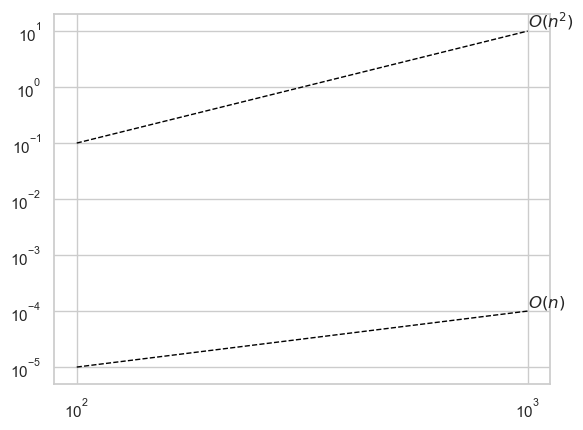

In [39]:

fig, ax = plt.subplots(1, 1)
sns.set_theme(style="whitegrid")
sort_case = "random_points"
sns.lineplot(data=df[df.sort_case == sort_case], x="n", y="time", ax=ax, hue="container") #, palette=hue_colors)


ax.set(xscale="log", yscale="log")

xs = [100, 1000]; ys = [1e-1, 1e+1]
ax.plot(xs, ys, color="black", linestyle="dashed", linewidth=1)
ax.text(xs[-1], ys[-1], "$O(n^{2})$", fontsize=12, verticalalignment="bottom")

xs = [100, 1000]; ys = [1e-5, 1e-4]
ax.plot(xs, ys, color="black", linestyle="dashed", linewidth=1)
ax.text(xs[-1], ys[-1], "$O(n)$", fontsize=12, verticalalignment="bottom")

xs = [math.pow(10, i) for i in range(1, 7)]
ys = [x*math.log(x)/10000000 for x in xs]

plt.savefig(f"tex/figs/tests_{sort_case}.pdf", bbox_inches='tight', pad_inches=0.0)

plt.show()